<a href="https://colab.research.google.com/github/tinumide/ml-scratch/blob/ann/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an Artificial Neural Network from Scratch


## Import Libraries

In [164]:
import os
import io
import sys
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Load dataset

In [95]:
df = pd.read_csv('/content/sample_data/data.csv')


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [97]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [98]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [112]:
X = np.array(df.drop('diagnosis',axis=1))

y = np.array(df.diagnosis)

In [113]:
le = LabelEncoder()
y = le.fit_transform(y)

In [114]:
X_mean = np.mean(X,axis=1,keepdims=True) #Find the mean of each feature
X_max = np.max(X,axis=1,keepdims=True) #Find the maximum of each feature
X_normalized = (X-X_mean)/(X_max) 

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=40)
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

## Log Loss Cost Function

In [116]:
def loss(y, y_pred):
  log_loss = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
  return np.sum(log_loss) / y.shape[0]

## Sigmoid Activation Function


In [117]:
def sigmoid(z):
  """
  """
  return 1/(1+ np.exp(-z))


# Rectified Linear Unit (ReLU) Activation Function 

In [118]:
def ReLU(z):
  """
  """
  return np.maximum(0, z)

## Layer definition

In [124]:
class Layer:

  def __init__(self, nodes):

    self.nodes = nodes
    self.inputs = None
    self.outputs = None
    self.weights = None
    self.bias = None
    self.level = None

  def forwardPass(self, input):
    """
    """
    z = np.dot(input, self.weights) + self.bias

    # print(f"z for layer {self.level}: {z}")

    output = self.activation_function(z)

    # print(f"layer_{self.level}_out: {output}")

    self.inputs = input
    self.outputs = output

    return output

  def activation_function(self):
    """
    """
    raise NotImplementedError

  def activate_derivative(self):
    """
    """
    raise NotImplementedError

  def update_parameters(self, 
                        l_r,
                      delta_weight, 
                      delta_bias,
                      n_records):
      """
      Update weights and bias on gradient descent step
      
      delta_weight_matrix: change in weights in each hidden layer
      delta_bias_matrix: change in bias in each hidden layer
      n_records: number of records
      """
      
      self.weights += l_r * delta_weight / n_records 
      self.bias += l_r * delta_bias / n_records


class sigmoidLayer(Layer):

  def activation_function(self, z):
    """
    """
    return sigmoid(z)

  def activate_derivative(self):
    """
    """
    return self.outputs * (1 - self.outputs) 


class ReLULayer(Layer):


  def activation_function(self, z):
    """
    """
    return ReLU(z)

  def activate_derivative(self):
    """
    """
    return np.heaviside(self.outputs, 0)

## The Neural Network

In [125]:
class NeuralNetwork:

    def __init__(self, 
                 input_nodes: int, 
                 layers: list, 
                 learning_rate: float
                 ):
      self.input_nodes = input_nodes 
      self.layers = layers
      self.l_r = learning_rate
      self.network = []
      self.architecture = []

    
    def createNetwork(self):
      """
      """

      input = self.input_nodes
      np.random.seed(99)
      for idx, layer in enumerate(self.layers):
        
        nodes = layer[0]
        activation_function = layer[1]

        if activation_function == "ReLU":
          Layer = ReLULayer(nodes)
        elif activation_function == "tanh":
          pass
        else:
          Layer = sigmoidLayer(nodes)

        Layer.level = idx

        Layer.weights = np.random.uniform(-1, 1,
                                      (input, nodes))
        Layer.bias = np.zeros((1, nodes)) 
        self.network.append(Layer)

        self.architecture.append({
            "input_dim": input, 
            "output_dim": nodes, 
            "activation": activation_function
        })
        
        input = nodes
      
      return self
                    
    
    def feedForward(self, X) -> (np.array):
      """
      Forward pass through the network

      X: input
      type: nD array
      
      returns: final output of the network and the output of each hidden nodes 
      in each hidden layer
      rtype: tuple of nD arrays
      """
      inputs = X
      # print(f"inputs: {inputs}")
      for layer in self.network:

        outputs = layer.forwardPass(inputs)

        inputs = outputs
  
      return outputs

    def backpropagation(self, 
                        y,
                        y_pred,  
                        delta_weight_matrix, 
                        delta_bias_matrix
                        ) -> (np.array):
        """
        Implement backpropagation using log loss error function
        
        X: input features
        y: target 
        y_pred: predicted values of y after forward pass
        delta_weight_matrix: change in weights for all layers
        delta_bias_matrix: change in bias in for all layers

        returns: delta_weight_matrix, delta_bias_matrix
        rtype: tuple of nD arrays
        """
        # d_out is gradient of the loss on the output 
        d_out = - (y/y_pred + (1-y)*1/1-y_pred) 
        # print(f"d_out: {d_out.shape}")

        # start from the output layer
        for i, layer in reversed(list(enumerate(self.network))):
          # print(i)

          # chain d_out with gradient of output to activation
          dout_prime = layer.activate_derivative()
          #print(f"dout_prime: {dout_prime.shape}")
          
          da = d_out * dout_prime
          #print(f"da: {da.shape}")
          
          # chain da with gradient of output to weight
          dw = np.dot(layer.inputs.T, da)
          #print(f"dw: {dw.shape}")
          
          delta_weight_matrix[i] = dw
          # chain da with gradient of output to bias
          db = da
          #print(f"db: {db.shape}")
          delta_bias_matrix[i] = np.sum(da, axis=0, keepdims=True )
          
          # d_out for the next layer is scaled by the weights in the curr layer
          d_out = np.dot(d_out, layer.weights.T)        
        
        return delta_weight_matrix, delta_bias_matrix


    def update_parameters(self, 
                          delta_weight_matrix, 
                          delta_bias_matrix,
                          n_records
                      ):
      """
      Update weights and bias on gradient descent step
      
      delta_weight_matrix: change in weights for all layers
      delta_bias_matrix: change in bias in for all layers
      n_records: number of records
      """
      print("updating parameters ....")
      for i, layer in  enumerate(self.network):
        layer.weights += self.l_r * delta_weight_matrix[i] / n_records 
        # print(f"new_layer_{i}_weights: {layer.weights}")
        layer.bias += self.l_r * delta_bias_matrix[i] / n_records

    def train(self, X_train, y):
        """
        Train the network on batch of features and targets. 
        
        X_train: nD array, each row is one data record, each column 
        is a feature in a data record
        y: 1D array of target values
        """
        n_records = X_train.shape[0]

        # We need to record this, because we can only make the updates after
        # a full back prop
        weight_matrix = [] # change in weights for all layers
        bias_matrix = []
        end_weight_matrix = []
        end_bias_matrix = []
        delta_weight_matrix = [] # change in weights for all layers
        delta_bias_matrix = [] # change in bias for all layers
        
        # add dw and db for each layer into matrices 
        # delta_weight_matrix and delta_bias_matrix 
        for layer in self.network:
          weight_matrix.append(layer.weights)
          bias_matrix.append(layer.bias)
          delta_weight_matrix.append(np.zeros(layer.weights.shape))
          delta_bias_matrix.append(np.zeros(layer.bias.shape))

            
        y_pred = self.feedForward(X_train) 
        
        delta_weight_matrix, delta_bias_matrix = self.backpropagation( 
                                                          y, 
                                                          y_pred,
                                                          delta_weight_matrix, 
                                                          delta_bias_matrix
                                                        )
        
        # print(f"start_w_mat: {weight_matrix}")
        # print(f"weight_change: {delta_weight_matrix}")
        
        self.update_parameters(delta_weight_matrix, delta_bias_matrix, n_records)

        for layer in self.network:
          end_weight_matrix.append(layer.weights)
          end_bias_matrix.append(layer.bias)

        
        # print(f"new_weights: {end_weight_matrix}")
        # print(f"start_b_mat: {bias_matrix}")
        # print(f"bias_change: {delta_bias_matrix}")
        # print(f"new_bias: {end_bias_matrix}")

        return y_pred
    

# Training the Neural Network

In [ ]:
epochs = 80
# X_train = np.array([[1, 2, 3], 
#               [4, 5, 6]])
# Y_train = np.array([[1], [0]])

model = NeuralNetwork(X_train.shape[1], 
                      [(16, "ReLU"),
                       (1, "sigmoid"),
                      ],
                       0.0009)
model.createNetwork()

print(model.architecture)

losses = {'train':[], 'validation':[]}
for epoch in range(epochs):
    # Go through a random batch of 128 records from the training data set
    # batch = np.random.choice(X_train.index, size=128)
    # X, y = X_train.ix[batch].values, train_targets.ix[batch]['cnt']

    Y_train = Y_train.reshape(455, 1)
                             
    y_pred = model.train(X_train, Y_train)

    
    
    # Printing out the training progress
    train_loss = loss(Y_train, y_pred)
    print(train_loss)
    # val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    print("\rProgress: {:2.1f}".format(100 * epoch/float(epochs))
                     + "% ... Training loss: " + str(train_loss)
                    #  + " ... Validation loss: " + str(val_loss)[:5]
                     )
    # sys.stdout.flush()
    
    losses['train'].append(train_loss)
    # losses['validation'].append(val_loss)

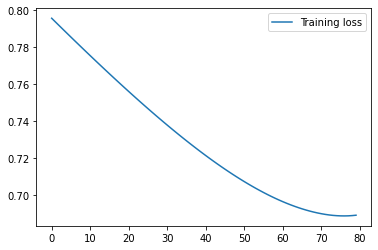

In [177]:
plt.plot(losses['train'], label='Training loss')
# plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [184]:
y_pred = (y_pred>0.5).astype(int)
accuracy_score(y_pred, Y_train)

0.6197802197802198

## Make some predictions

In [186]:
predictions = model.feedForward(X_test)
predictions = (predictions>0.5).astype(int)
accuracy_score(predictions, Y_test)

0.6578947368421053

## Tests

In [68]:
# Sanity check: Weights and bias dimension are properly set
for layer in model.network:
  print(layer.weights.shape, layer.bias.shape)


(3, 5) (1, 5)
(5, 1) (1, 1)


In [33]:
# Sanity check: Network creation works properly

model = NeuralNetwork(3, [(2, "ReLU"),
                          (1, "sigmoid"),
                          ],
                       0.01)
model.createNetwork()

print(model.architecture)

[{'input_dim': 3, 'output_dim': 2, 'activation': 'ReLU'}, {'input_dim': 2, 'output_dim': 1, 'activation': 'sigmoid'}]


In [45]:
# Sanity check for feed forward
x = np.array([[1, 2, 3], 
              [4, 5, 6]])
out = model.feedForward(x)
print('SHAPE:', out.shape)
print('Probabilties :', out)

SHAPE: (2, 1)
Probabilties : [[0.57264512]
 [0.69036214]]


In [46]:
# Sanity check for back propagation
delta_weight_matrix = [] # change in weights for all layers
delta_bias_matrix = [] # change in bias for all layers
for layer in model.network:
    delta_weight_matrix.append(np.zeros(layer.weights.shape))
    delta_bias_matrix.append(np.zeros(layer.bias.shape))

y = np.array([[1], [0]])
delta_weight_matrix, delta_bias_matrix = model.backpropagation(y, out, delta_weight_matrix, delta_bias_matrix)
model.update_parameters(delta_weight_matrix, delta_bias_matrix, x.shape[0])
for layer in model.network:
  print(layer.weights.shape, layer.bias.shape)

(3, 2) (1, 2)
(2, 1) (1, 1)


In [75]:
print(y_pred[:3])

[[nan]
 [nan]
 [nan]]
